# Avance II Proyecto Final 
### Equipo #3
### Grupo: 006 
### Frecuencia : Lunes, Miercoles,Viernes  6-7 pm
### Integrantes : 
* Francisco Ramon Ramirez Torres 1739900. 
* Cesar Gerardo Varela Cavazos 1748727. 
* Cesar Alejandro Barrera Martinez 1618509 



## Titulo: Video Games Sales. (Información histórica de ventas de videojuegos)

## Descripcion de la Base de Datos:

 Esta base de datos contiene toda la historia de los videojuegos lanzados en su respectivo, año fundada en una empresa en particular, con su respectiva plataforma y las ventas que ha tenido en el Norte de America, EE.UU, Japon, etc; al igual que las ventas globales que ha tenido.

## Descripcion de las columnas: 
* Contiene nombre, genero, año de publicacion, plataforma, empresa desarrolladora, ventas en Estados Unidos,Norteamerica, Japon y categoria.
* Los tipos de datos que contiene la base de datos son String, flotantes, Caracter, contando con aproximadamente 10 mil registros de los videojuegos.

## Justificacion del uso de los datos.
* a). Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos.
    La diversa información acerca de los videojuegos, como la distribución de venta, popularidad de videojuegos, diversa variedad con géneros en los títulos de videojuegos y competencia entre empresas que tienen juegos similares en popularidad.

* b) Qué beneficio encuentran de trabajar con estos datos.
  Poder encontrar algún beneficio de manera que podemos calcular un precio estimado de un videojuego, ver un análisis de ventas sobre cómo se han visto ventas con otras empresas, podemos ver qué clase de videojuegos se han vendido más a través de los años según su aceptación para las empresas que se dedican a crear juegos puedan saber que genero es el que deben crear más.

## Preguntas de Interes
¿Cuál es la percepción de aceptación de videojuegos de las empresas ?

¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

¿Cómo se puede aplicar una red neuronal con de tipo clasificación con la base de datos?

### 1. Limpieza de datos


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import pandas_profiling 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Franc\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Importacion de librerias necesarias para utilizar nuestra base de datos y realizar acciones de limpieza y graficas estadisticas.

In [34]:
games = pd.read_csv("train.csv")

* Con esta variable games la usaremos para abrir nuestra BD de los videojuegos

###### a)	Mostrar los datos sin manipulación

In [35]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,NaN,NaN,NaN,NaN,Sand Grain Studios,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,84.0,70.0,8.1,733.0,Nintendo,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,53.0,6.0,6.0,8.0,Eurocom Entertainment Software,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN


* Usamos la funcion head() para mostrar los primeros 5 registros solo para revisar si cargo correctamente

In [36]:
games.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,87.0,89.0,6.3,1454.0,Treyarch,M
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,0.22,83.0,91.0,7.8,543.0,Insomniac Games,M
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,0.01,37.0,31.0,NaN,NaN,10tacle Studios,T
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN
11702,NHL 2K9,PS3,2008.0,Sports,Take-Two Interactive,0.11,0.01,0.00,0.01,70.0,21.0,NaN,NaN,Visual Concepts,E10+


* Usamos la funcion tail() para mostrar los primeros 5 registros solo para revisar si cargo correctamente
* Como se ve con la fucion head() y tail() se muestran registros con alguno de los registros de videojuegos contando con nombres, ventas, puntuaciones, genero

In [37]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

###### b)	Eliminar columnas no deseadas.

In [139]:
games.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [38]:
games2 = games.drop_duplicates(['Name','Platform',])

In [39]:
nuevaBD = games2.drop(['User_Count', 'User_Score', 'Critic_Count','Developer','Rating','Other_Sales'], axis=1)

In [40]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,NaN
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,NaN
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,NaN


* Eliminamos algunas columnas que no nos ayudan tanto ya que muchos datos eran vacios o NaN y no nos serviria hacer analisis de datos vacios. Esto nos complicaria mas hacer analisis y agregar valores para los datos de columnas faltantes lo que es mejor eliminarlas para evitar problemas y no utilizar valores falsos o inventados y puedan afectar estadisticas.

* Anteriormente se tenia contemplado la columna RATING, pero como el numero de datos NaN era demasiado 4760,se tenia contemplado usar la clasificacion RP que ERSB (Entertainment Software Rating Board) se califica como Calificacion Pendiente, lo cual para 4760 juegos con calificacion pendiente seria un dato que no serviria ya que solo se usa para evaluacion corta o despues de lanzar version oficial o version final, el cual los juegos demuestran ventas es decir que ya son versiones finales o oficiales. Lo cual fue el motivo de eliminacion.

###### c)	Correcta manipulación de los datos nulos dentro de la base de datos.

In [140]:
nuevaBD.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       1
dtype: int64

In [59]:
nuevaBD = nuevaBD.fillna(70)

Un solo dato presenta NaN en Critic_Score lo cual le asignamos uno ya que solo es un dato, y podemos tener nuestra base de datos limpia de datos vacios y de errores.

In [60]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,84.0
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,69.0
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,69.0
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,70.0


In [61]:
nuevaBD.to_csv('Videojuegos.csv', index=False)

Ya tenemos nuestra base de datos nueva y guardada ya con datos que pueden ser utilizados para trabajar con ellos.

In [2]:
games2 = pd.read_csv("Videojuegos.csv")

In [3]:
games2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,84.0
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,69.0
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,69.0
...,...,...,...,...,...,...,...,...,...
11694,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11695,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11696,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11697,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,70.0


Mostramos la nueva Base de Datos con columnas y datos que no servirian, asi que se puede crear una mejor visualizacion de datos sin tener errores ni nombres repetidos de videjuegos

In [4]:
Capcom = games2[games2['Publisher']=='Capcom']

In [5]:
Capcom_acccion = games2[games2['Genre']=='Action']

In [6]:
SNK = games2[games2['Publisher']=='SNK']

In [7]:
Rockstar = games2[games2['Publisher']=='Take-Two Interactive']

In [8]:
EA  = games2[games2['Publisher']=='Electronic Arts']

In [9]:
 Nintendo= games2[games2['Publisher']=='Nintendo']

In [10]:
Deportes  = games2[games2['Genre']=='Sports']

In [11]:
Accion = games2[games2['Genre']=='Action']

In [12]:
Carreras = games2[games2['Genre']=='Racing']

In [13]:
Rol =games2[games2['Genre']=='Rol-Playing']

In [14]:
Disparos = games2[games2['Genre']=='Shooter']

In [15]:
Peleas = games2[games2['Genre']=='Fighting']

Creamos algunas clases en las cuales se pueden dividir nuestros generos y empresas para despues estudiarlos y analizarlos graficamente.

In [16]:
Capcom

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
54,DuckTales: Remastered,PC,2013.0,Action,Capcom,0.00,0.01,0.00,66.0
57,Resident Evil Director's Cut,PS3,2006.0,Action,Capcom,0.00,0.00,0.05,86.0
168,Dead Rising 2: Off the Record,PC,2011.0,Action,Capcom,0.04,0.02,0.00,66.0
192,Bombastic,PS2,2002.0,Puzzle,Capcom,0.03,0.02,0.00,72.0
274,Mega Man Battle Network,GBA,2001.0,Role-Playing,Capcom,0.14,0.05,0.22,79.0
...,...,...,...,...,...,...,...,...,...
11578,Mega Man Xtreme 2,GB,2001.0,Platform,Capcom,0.00,0.00,0.07,68.0
11592,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.02,0.00,0.00,53.0
11598,Sengoku Basara: Chronicle Heroes,PSP,2011.0,Action,Capcom,0.00,0.00,0.16,64.0
11639,Phoenix Wright: Ace Attorney - Justice for All,DS,2006.0,Adventure,Capcom,0.21,0.04,0.26,93.0


In [17]:
Disparos

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
7,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,0.01,0.04,0.00,82.0
15,Cold Winter,PS2,2005.0,Shooter,Vivendi Games,0.06,0.04,0.00,73.0
28,Call of Duty: Ghosts,XOne,2013.0,Shooter,Activision,1.88,0.77,0.00,78.0
39,Max Payne,XB,2001.0,Shooter,Take-Two Interactive,0.98,0.19,0.00,89.0
48,SD Gundam Force: Showdown!,PS2,2004.0,Shooter,Namco Bandai Games,0.02,0.01,0.00,54.0
...,...,...,...,...,...,...,...,...,...
11684,Mercenaries 2: World in Flames,PS3,2008.0,Shooter,Electronic Arts,0.29,0.39,0.02,72.0
11687,Chili Con Carnage,PSP,2007.0,Shooter,Eidos Interactive,0.00,0.01,0.00,74.0
11689,Star Wars Jedi Knight II: Jedi Outcast,GC,2002.0,Shooter,Activision,0.18,0.05,0.00,75.0
11694,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0


In [18]:
Rockstar

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
39,Max Payne,XB,2001.0,Shooter,Take-Two Interactive,0.98,0.19,0.0,89.0
58,Midnight Club II,XB,2003.0,Racing,Take-Two Interactive,0.42,0.06,0.0,86.0
73,Fantastic Four: Rise of the Silver Surfer,Wii,2007.0,Action,Take-Two Interactive,0.04,0.01,0.0,39.0
120,Ford Mustang: The Legend Lives,XB,2005.0,Racing,Take-Two Interactive,0.07,0.02,0.0,55.0
153,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,Take-Two Interactive,0.19,0.00,0.0,66.0
...,...,...,...,...,...,...,...,...,...
11645,Royal Palace of White Sword and The City of Ge...,PC,2009.0,Role-Playing,Take-Two Interactive,0.00,0.02,0.0,43.0
11652,The Darkness II,PC,2012.0,Shooter,Take-Two Interactive,0.10,0.03,0.0,77.0
11654,Serious Sam II,PC,2005.0,Shooter,Take-Two Interactive,0.00,0.01,0.0,74.0
11674,NBA 2K7,PS2,2006.0,Sports,Take-Two Interactive,0.65,0.02,0.0,81.0


In [19]:
EA

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
8,Madden NFL 2003,XB,2002.0,Sports,Electronic Arts,0.67,0.02,0.00,92.0
30,Tiger Woods PGA Tour 2004,PS2,2003.0,Sports,Electronic Arts,1.18,0.34,0.00,89.0
33,wwe Smackdown vs. Raw 2006,PS2,2009.0,Fighting,Electronic Arts,1.57,1.02,0.00,46.0
34,Command & Conquer: Red Alert 3 Ultimate Edition,PS3,2009.0,Strategy,Electronic Arts,0.14,0.15,0.00,46.0
50,FaceBreaker,X360,2008.0,Fighting,Electronic Arts,0.15,0.02,0.00,54.0
...,...,...,...,...,...,...,...,...,...
11670,Madden NFL 17,PS3,2016.0,Sports,Electronic Arts,0.07,0.02,0.00,55.0
11673,FIFA 16,X360,2015.0,Sports,Electronic Arts,0.57,0.88,0.00,81.0
11676,Medal of Honor: European Assault (All Region s...,PS2,2005.0,Shooter,Electronic Arts,0.89,0.69,0.09,68.0
11684,Mercenaries 2: World in Flames,PS3,2008.0,Shooter,Electronic Arts,0.29,0.39,0.02,72.0


In [20]:
Nintendo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
12,Devil's Third,WiiU,2015.0,Action,Nintendo,0.04,0.02,0.00,43.0
88,Gameboy Gallery,GB,1995.0,Misc,Nintendo,0.00,0.00,0.30,68.0
99,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0
105,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,54.0
...,...,...,...,...,...,...,...,...,...
11565,Fire Emblem: Fuuin no Tsurugi,GBA,2002.0,Role-Playing,Nintendo,0.00,0.00,0.39,80.0
11567,LEGO City Undercover,WiiU,2013.0,Platform,Nintendo,0.47,0.42,0.13,80.0
11582,Osu! Tatakae! Ouendan,DS,2005.0,Misc,Nintendo,0.00,0.00,0.06,77.0
11591,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010.0,Puzzle,Nintendo,1.63,0.51,0.35,79.0


## Preguntas de Interes (Respuestas).
* ¿Cuál es la percepción de aceptación de videojuegos de las empresas ?
    
    R= Para esto vamos a utilizar las columnas que contienen datos de Publisher que es la empresa con las ventas que ha hecho y el Critic_Score para medir la aceptacion, lo que se espera es que con estos datos la aceptacion de una venta es a base que buena fueron las ventas de los videojuegos y la calificacion podemos obtener la aceptacion.
* ¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

    R= lo que se puede hacer es un clasificador de videojuegos dando datos del genero (Genre) y la empresa de videojuegos (Publisher) el cual es una de las formas que se pueden utilizar de manera rapida obteniendo resultados organizacion de videojuegos.
    
#### Preguntas nuevas y posibles.
* ¿ Como podemos ver el comportamiento (graficamente) de las empresas con sus respectivas ventas  ?

* ¿ Cual es la plataforma de videojuegos (consola) con mayores ventas de videojuegos en un genero especifico (shooter,deportes,Carreras) ?



### 2. Estadistica de los datos.

In [22]:
games2['NA_Sales'].sum()

3150.7599999999998

In [23]:
games2['NA_Sales'].describe()

count    11699.000000
mean         0.269319
std          0.887464
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_Sales, dtype: float64

In [24]:
games2['Critic_Score'].describe()

count    11698.000000
mean        69.060096
std         13.977824
min         17.000000
25%         61.000000
50%         71.000000
75%         80.000000
max         98.000000
Name: Critic_Score, dtype: float64

In [26]:
games2['Publisher'].describe()

count               11699
unique                520
top       Electronic Arts
freq                  936
Name: Publisher, dtype: object

### 3.Graficas

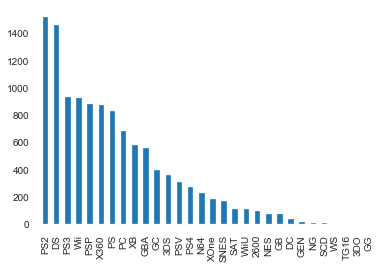

In [31]:
games2['Platform'].value_counts().plot.bar()

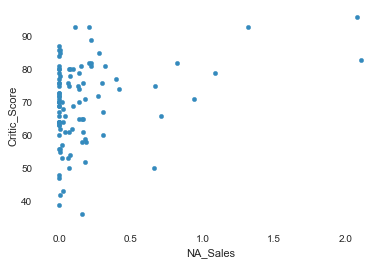

In [42]:
Capcom[Capcom['NA_Sales'] < 100].sample(100).plot.scatter(x='NA_Sales', y='Critic_Score')

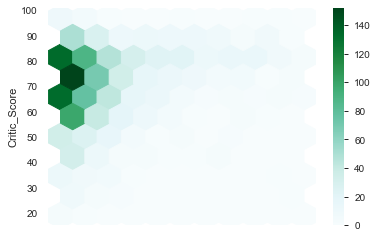

In [43]:
Deportes[Deportes['NA_Sales'] < 1].plot.hexbin(x='NA_Sales', y='Critic_Score', gridsize=10)

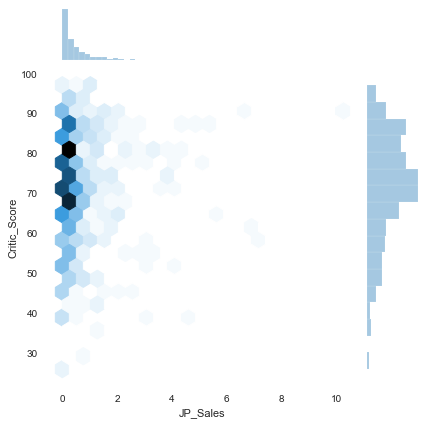

In [50]:
sn.jointplot(x='JP_Sales', y='Critic_Score', data=Nintendo[Nintendo['JP_Sales'] < 100], kind='hex', 
              gridsize=20)

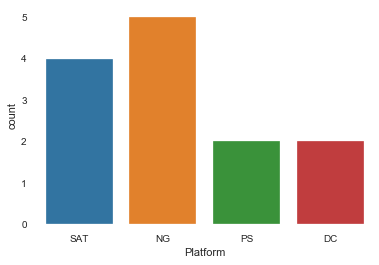

In [47]:
sn.countplot(SNK['Platform'])

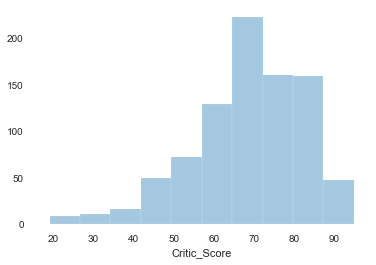

In [53]:
sn.distplot(Carreras['Critic_Score'], bins=10, kde=False)